In [1]:
import numpy as np
import struct
from PIL import Image
import matplotlib.pyplot as plt

Dataset provided from http://etlcdb.db.aist.go.jp/

In [2]:
# Function for reading and recording character data provided by the ETL database
# https://github.com/choo/etlcdb-image-extractor

def read_record_hiragana_ETL8G(file):
    s = file.read(8199)
    r = struct.unpack('>2H8sI4B4H2B30x8128s11x', s)
    imgF = Image.frombytes('F', (128, 127), r[14], 'bit', 4)
    imgP = imgF.convert('P')
    return r + (imgP, )

In [54]:
# Function for reading and recording each ETL file containing hiragana characters and recording and saving them
# to a compressed file hiragana.npz

# ETL8G specifications: http://etlcdb.db.aist.go.jp/specification-of-etl-8

def read_hiragana():
    hiragana = np.zeros([71, 160, 127, 128], dtype = np.uint8) # 71 characters, 160 writers, img size = 127x128
    for filenumber in range(1, 33):
        filename = './ETL8G/ETL8G_{:02d}'.format(filenumber)
        with open(filename, 'rb') as f:
            for dataset in range(5): # 5 data sheets per file
                counter = 0
                for character in range(956): # 956 characters written per data sheet
                    r = read_record_hiragana_ETL8G(f)
                    if b'.HIRA' in r[2] or b'.WO' in r[2]: # only record hiragana characters; ETL8G files contain kanji
                        if b'KAI' not in r[2] and b'HEI' not in r[2]: # Kanji KAI and HEI labelled with .HIRA are removed
                            hiragana[counter, (filenumber - 1) * 5 + dataset] = np.array(r[-1])
                            counter = counter + 1
    np.savez_compressed("hiragana.npz", hiragana)

In [24]:
read_hiragana()
hiragana = np.load('hiragana.npz')

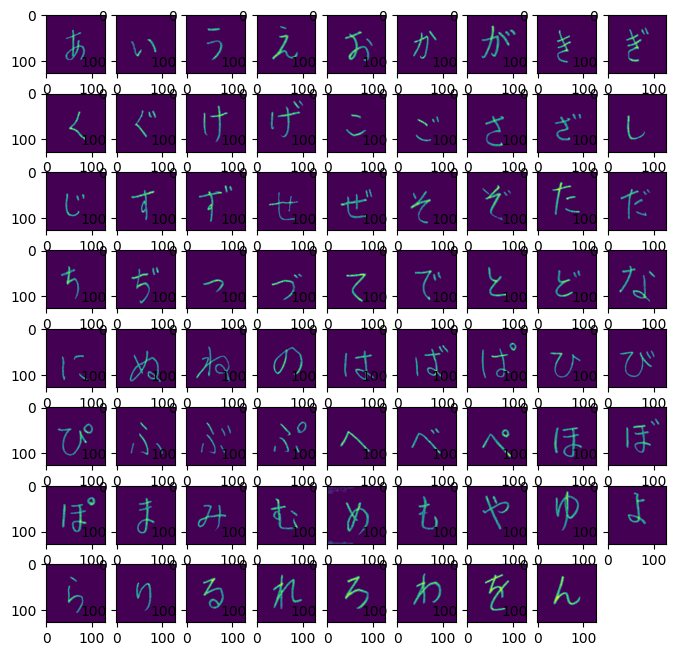

In [22]:
fig = plt.figure(figsize = (8, 9))
for i in range(71):
    hiragana_image = hiragana['arr_0'][i, 159]
    fig.add_subplot(9, 9, i + 1)
    plt.imshow(hiragana_image)